# Modeling and Simulation in Python

Orbital Homework

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


### Shashank Swaminathan

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
G_unit = N * ((m/kg) ** 2)
d = 24 * 3600 * s
week = UNITS.week
year = UNITS.year
AU = UNITS.astronomical_unit

<Unit('astronomical_unit')>

In [3]:
def make_system_1D():

    r_0 = (1 * AU).to_base_units()
    v_0 = 0 * m / s
    init = State(r=r_0,
                 v=v_0)

    r_earth = 6.371e6 * m
    r_sun = 695.508e6 * m

    system = System(init=init,
                    G=6.674e-11 * G_unit,
                    m_sun = 1.989e30 * kg,
                    collision_distance = r_sun + r_earth,
                    m_earth = 5.972e24 * kg,
                    t_0= 0 * s,
                    t_end= 1 * year)
    return system

In [4]:
def make_system_2D():
    r_earth = 6.371e6 * m
    r_sun = 695.508e6 * m

    x_0 = (1 * AU).to_base_units()
    y_0 = 0 * m
    vx_0 = 0 * m/s
    vy_0 = 30330 * m/s

    init = State(x = x_0,
                 y = y_0,
                 vx = vx_0,
                 vy = vy_0,)

    system = System(init=init,
                    G=6.674e-11 * G_unit,
                    m_sun = 1.989e30 * kg,
                    collision_distance = r_sun + r_earth,
                    m_earth = 5.972e24 * kg,
                    t_0= 0 * s,
                    t_end= 2 * year)
    return system

In [5]:
def universal_gravitation_1D(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    r, v = state
    unpack(system)
    
    force = G * m_sun * m_earth / r**2
    return force

In [6]:
def slope_func_1D(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    r, v = state
    unpack(system)    

    force_grav = universal_gravitation_1D(state, system)
    drdt = v
    dvdt = -force_grav / m_earth
    
    return drdt, dvdt

In [7]:
def universal_gravitation_2D(r, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    unpack(system)
    
    mag = -G * m_sun * m_earth / r.mag**2
    angle = r.hat()
    
    force = angle * mag
    return force

In [8]:
def slope_func_2D(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)

    r = Vector(x, y)    
    a_grav = universal_gravitation_2D(r, system) / m_earth
    
    return vx, vy, a_grav.x, a_grav.y

In [9]:
def event_func_1D(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
    r, v = state
    
    return r - system.collision_distance

In [10]:
def event_func_2D(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
    x, y, vx, vy = state
    
    r = Vector(x,y)
    
    return r.mag - system.collision_distance

In [11]:
system_1D = make_system_1D()
system_2D = make_system_2D()

,values
init,x 149597870691.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m_sun,1.989e+30 kilogram
collision_distance,701879000.0 meter
m_earth,5.972e+24 kilogram
t_0,0 second
t_end,2 year


In [12]:
# Found that the LSODA solver looks even nicer than the RK23 solver
results_1D, details_1D = run_ode_solver(system_1D, slope_func_1D, events=event_func_1D, method = 'LSODA')
results_2D, details_2D = run_ode_solver(system_2D, slope_func_2D, events=event_func_2D, method = 'LSODA')

In [13]:
results_shifted_1D = pd.Series(results_1D.r.values * m - system_1D.collision_distance, index = results_1D.r.index)

0.000000e+00    1.488960e+11
5.331260e-03    1.488960e+11
1.066252e-02    1.488960e+11
5.332326e+01    1.488960e+11
1.066359e+02    1.488960e+11
1.599485e+02    1.488960e+11
6.930744e+02    1.488960e+11
1.226200e+03    1.488960e+11
1.759326e+03    1.488960e+11
2.292452e+03    1.488960e+11
7.623712e+03    1.488958e+11
1.295497e+04    1.488955e+11
1.828623e+04    1.488950e+11
2.361749e+04    1.488943e+11
3.291238e+04    1.488928e+11
4.220728e+04    1.488907e+11
5.150217e+04    1.488881e+11
1.444511e+05    1.488341e+11
2.374000e+05    1.487288e+11
3.303490e+05    1.485721e+11
4.232979e+05    1.483639e+11
9.763483e+05    1.460491e+11
1.529399e+06    1.418434e+11
2.082449e+06    1.356319e+11
2.635500e+06    1.272237e+11
3.314703e+06    1.134155e+11
3.817863e+06    1.001830e+11
4.225257e+06    8.705297e+10
4.547120e+06    7.466334e+10
4.797986e+06    6.333514e+10
4.991023e+06    5.323897e+10
5.138057e+06    4.441551e+10
5.249152e+06    3.682029e+10
5.332555e+06    3.035937e+10
5.394848e+06  

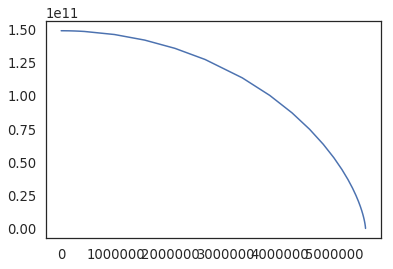

In [14]:
results_shifted_1D.plot()

In [15]:
results_2D

,x,y,vx,vy
0.000000e+00,1.495979e+11,0.000000e+00,0.000000e+00,30330.000000
1.042624e-09,1.495979e+11,3.162278e-05,-6.184403e-12,30330.000000
2.085247e-09,1.495979e+11,6.324555e-05,-1.236881e-11,30330.000000
1.042832e-05,1.495979e+11,3.162910e-01,-6.185639e-08,30330.000000
2.085456e-05,1.495979e+11,6.325188e-01,-1.237004e-07,30330.000000
3.128080e-05,1.495979e+11,9.487465e-01,-1.855444e-07,30330.000000
1.355432e-04,1.495979e+11,4.111024e+00,-8.039847e-07,30330.000000
2.398055e-04,1.495979e+11,7.273302e+00,-1.422425e-06,30330.000000
3.440679e-04,1.495979e+11,1.043558e+01,-2.040865e-06,30330.000000
1.386692e-03,1.495979e+11,4.205836e+01,-8.225268e-06,30330.000000


In [16]:
res_2D_vect = pd.Series(index = results_2D.index)
for i in results_2D.index:
    results_2D_r = Vector(results_2D.x[i], results_2D.y[i])
    res_2D_vect[i] = results_2D_r.mag - system_2D.collision_distance / m

Text(0,0.5,'Distance (m)')

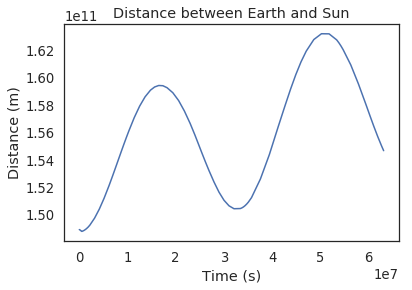

In [17]:
res_2D_vect.plot()
plt.title('Distance between Earth and Sun')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Text(0,0.5,'Y distance between the Sun and the Earth (m)')

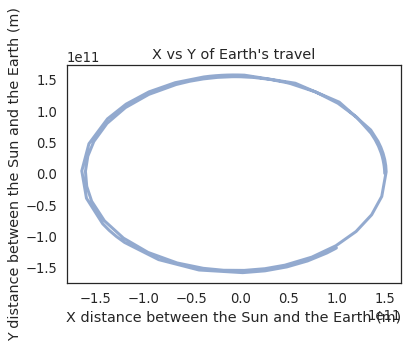

In [18]:
plot(results_2D.x.values, results_2D.y.values)
plt.title('X vs Y of Earth\'s travel')
plt.xlabel('X distance between the Sun and the Earth (m)')
plt.ylabel('Y distance between the Sun and the Earth (m)')

In [19]:
def gpe(state, system):
    x, y, vx, vy = state
    
    r = Vector(x, y) * m
    
    return -system.G * system.m_sun * system.m_earth/r.mag

In [20]:
def kin_e(state, system):
    x, y, vx, vy = state
    
    v = Vector(vx, vy) * m/s
    
    return 0.5 * system.m_earth * v.mag ** 2

In [21]:
delta_gpe = gpe(results_2D.iloc[0], system_2D) - gpe(results_2D.iloc[-1], system_2D)

<Quantity(-1.9670112529387656e+32, 'meter * newton')>

In [22]:
delta_kin_e = kin_e(results_2D.iloc[0], system_2D) - gpe(results_2D.iloc[-1], system_2D)

<Quantity(7.8494086127115e+33, 'kilogram * meter ** 2 / second ** 2')>

In [23]:
delta_gpe + delta_kin_e

<Quantity(7.652707487417623e+33, 'meter * newton')>